# Week 2 – Day 2: Polynomial Regression & Overfitting

## Objective of the day
Understand how to make linear regression more flexible with polynomial features, and see the danger of overfitting.

About the warning:
You trained with a DataFrame (X has the column name "MedInc") but predicted with a NumPy array (X_plot has no column name). scikit-learn warns:

“X does not have valid feature names, but the model was fitted with feature names.”

c:\AI-Mastery\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\AI-Mastery\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\AI-Mastery\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


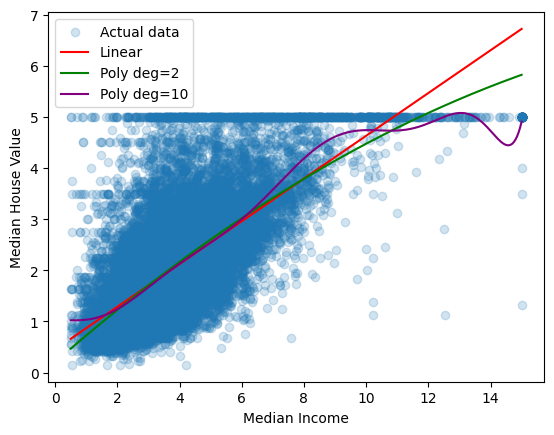

Linear R²: 0.4734474918071989
Degree 2 R²: 0.47802403432955454
Degree 10 R²: 0.4882920804002091


In [8]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

housing = fetch_california_housing(as_frame=True)
df = housing.frame

# Use only median income for simplicity
X = df[["MedInc"]]
y = df["MedHouseVal"]

# Sort values for plotting later
"""
Builds 300 evenly-spaced income values from the min to the max so you can draw smooth prediction curves.
"""
X_plot = np.linspace(X.min(), X.max(), 300).reshape(-1,1)

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_lin = lin_reg.predict(X_plot)

# Degree 2
poly2 = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("lin_reg", LinearRegression())
])
poly2.fit(X, y)
y_pred_poly2 = poly2.predict(X_plot)

# Degree 10
poly10 = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])
poly10.fit(X, y)
y_pred_poly10 = poly10.predict(X_plot)

plt.scatter(X, y, alpha=0.2, label="Actual data")
plt.plot(X_plot, y_pred_lin, color="red", label="Linear")
plt.plot(X_plot, y_pred_poly2, color="green", label="Poly deg=2")
plt.plot(X_plot, y_pred_poly10, color="purple", label="Poly deg=10")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.legend()
plt.show()

# Linear
r2_lin = r2_score(y, lin_reg.predict(X))
print("Linear R²:", r2_lin)

# Poly degree 2
r2_poly2 = r2_score(y, poly2.predict(X))
print("Degree 2 R²:", r2_poly2)

# Poly degree 10
r2_poly10 = r2_score(y, poly10.predict(X))
print("Degree 10 R²:", r2_poly10)

📊 Exercise of the Day

Compare R² of degree 1 (linear), degree 2, and degree 10 models. Which one fits the training data best?

Which one is more likely to overfit? Why?

Based on the plots, which model gives the most realistic generalization?

1) Degree 10 fits the data best

2) Degree 10 as it is very flexible it can move a lot to fit noise in the training data.

3) Degree 2 as it is not too simple and not too complex. It captures some curvature.

🟢 Bias vs Variance (intuition)

Bias = how much your model’s predictions are systematically off target because it’s too simple.

Variance = how much your model’s predictions swing around depending on the training data (too sensitive, memorizes noise).

The goal: find the “sweet spot” where total error (bias² + variance) is minimized.

🟡 Apply it to your models
1. Linear (degree 1)

Bias: high → a straight line can’t capture curvature in the data.

Variance: low → the line is stable, won’t wiggle.

Result: underfitting → misses real structure.

2. Polynomial degree 2

Bias: lower → quadratic curve bends to capture real trend.

Variance: moderate → still not too wiggly.

Result: good trade-off → explains data reasonably well and generalizes.

3. Polynomial degree 10

Bias: very low → curve can almost go through training points.

Variance: very high → small changes in data make the curve wiggle like crazy.

Result: overfitting → looks great on training, but poor generalization.

🟣 Visual analogy

Imagine shooting arrows at a target 🎯:

High bias (linear) → arrows cluster away from bullseye (systematically wrong).

High variance (degree 10) → arrows all over the place, sometimes on bullseye, sometimes way off.

Balanced (degree 2) → arrows form a tight group near the bullseye.

🌟 Mini-Challenge

Split into train/test (80/20).

Train degree 2 and degree 10 models separately.

Compare their train vs test R².
👉 What happens to degree 10? Does it shine on training but fail on test?

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit models again on training only
lin_reg.fit(X_train, y_train)
poly2.fit(X_train, y_train)
poly10.fit(X_train, y_train)

# Train scores
print("Train R² (Linear):", r2_score(y_train, lin_reg.predict(X_train)))
print("Train R² (Poly2):", r2_score(y_train, poly2.predict(X_train)))
print("Train R² (Poly10):", r2_score(y_train, poly10.predict(X_train)))

# Test scores
print("Test R² (Linear):", r2_score(y_test, lin_reg.predict(X_test)))
print("Test R² (Poly2):", r2_score(y_test, poly2.predict(X_test)))
print("Test R² (Poly10):", r2_score(y_test, poly10.predict(X_test)))


Train R² (Linear): 0.47699273458205227
Train R² (Poly2): 0.48159777620556554
Train R² (Poly10): 0.49291149248911414
Test R² (Linear): 0.45885918903846656
Test R² (Poly2): 0.46331772769346213
Test R² (Poly10): 0.469021769617183


All of them perform slighty better on train.

✨ Key Insight

Training score ≥ Test score is the norm.

If the gap is small → model generalizes well.

If the gap is large → overfitting.

You saw the bias–variance trade-off in action today:

Linear → high bias (too simple).

Poly10 → high variance (too complex).

Poly2 → just right balance.